In [2]:
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras import layers , models

In [3]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## What is Fashion MNIST ?
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 

Each training and test example is assigned to one of the following labels:

- T-shirt/top[0]
- Trouser[1]
- Pullover[2]
- Dress[3]
- Coat[4]
- Sandal[5]
- Shirt[6]
- Sneaker[7]
- Bag[8]
- Ankle boot[9]

In [40]:
Class_name = {0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}

In [5]:
print(f'x_train shape: {x_train.shape}\ny_train shape: {y_train.shape}\nx_test shape : {x_test.shape}\ny_test shape : {y_test.shape}')

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape : (10000, 28, 28)
y_test shape : (10000,)


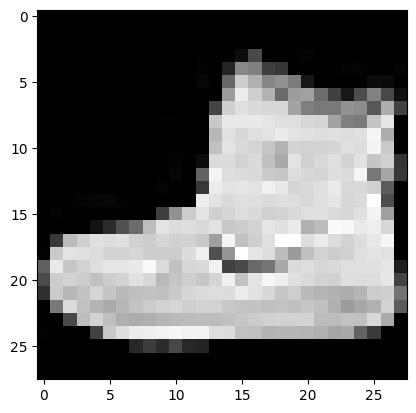

9


In [8]:
plt.imshow(x_train[0], cmap='gray')
plt.show()
print(y_train[0])

In [9]:
#Normalizing the image for nueral network for better understanding
x_train = x_train/255
x_test = x_test/255

In [11]:
#Reshape image to specify that it's a single channel (grapscale)
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))

In [12]:
#Creating the Convolutional Base
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add((layers.MaxPooling2D((2,2))))
model.add(layers.Conv2D(64,(2,2), activation='relu'))


#Adding Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10,activation='softmax'))

C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [15]:
history = model.fit(x_train,y_train, validation_split=0.1 , epochs=50 , validation_data=(x_test,y_test))

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9125 - loss: 0.2504 - val_accuracy: 0.9080 - val_loss: 0.2691
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9192 - loss: 0.2414 - val_accuracy: 0.8935 - val_loss: 0.3138
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9201 - loss: 0.2275 - val_accuracy: 0.9059 - val_loss: 0.2848
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9209 - loss: 0.2279 - val_accuracy: 0.9041 - val_loss: 0.2902
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9238 - loss: 0.2189 - val_accuracy: 0.9030 - val_loss: 0.2891
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9273 - loss: 0.2108 - val_accuracy: 0.9081 - val_loss: 0.2832
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9264 - loss: 0.2058 - val_accuracy: 0.9063 - val_loss: 0.3150
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9316 - loss: 0

Model Evaluation


In [16]:
test_loss , test_acc = model.evaluate(x_test,y_test)
print(f"Accuracy of Model on Test Dataset : {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9066 - loss: 0.5730
Accuracy of Model on Test Dataset : 0.9107999801635742


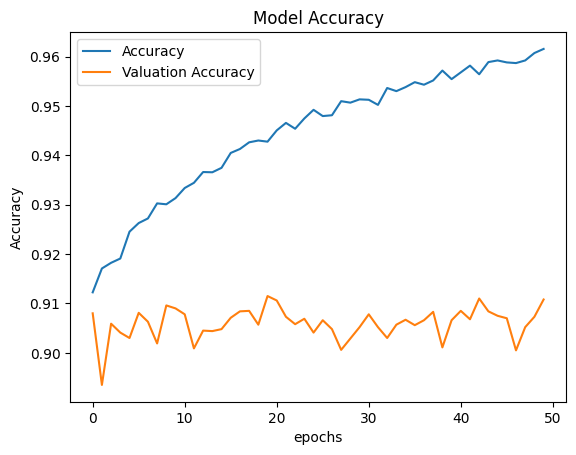

In [19]:
#Plot training and valuation accuracy value

plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Valuation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

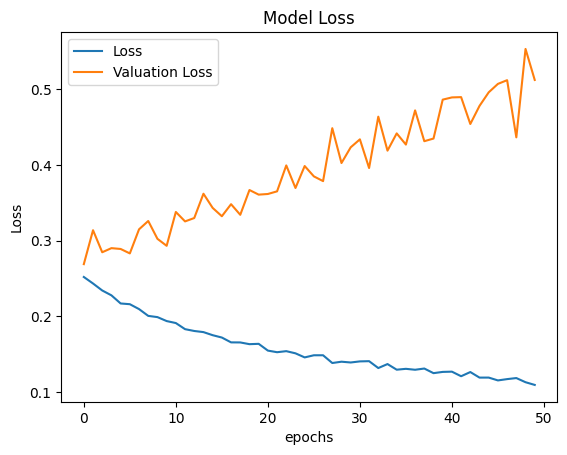

In [20]:
#Plot training and valuation loss value

plt.plot(history.history['loss'], label= 'Loss')
plt.plot(history.history['val_loss'], label = 'Valuation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [22]:
model.save('Fashion_MNIST_model.h5')

Prediction System

In [25]:
from PIL import Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction : Bag


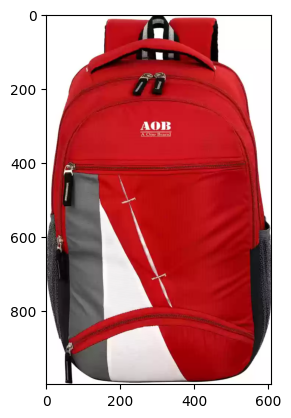

In [44]:
img_path = r'D:\Visual Studio Code\ML\Youtube_ML_Code\Fashion Mnist Recognition\Bag.webp'
img_recive = Image.open(img_path)
img_array= np.array(img_recive)
plt.imshow(img_array)
def img_processing(img_path):
    img = Image.open(img_path)
    img = img.resize((28,28))
    img = img.convert('L')
    img = np.array(img) / 255.0
    img = img.reshape((1,28,28,1))
    return img

img = img_processing(img_path)
result = model.predict(img)

pred = np.argmax(result)
prediction = Class_name[pred]

print("Prediction :",prediction)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction : Pullover


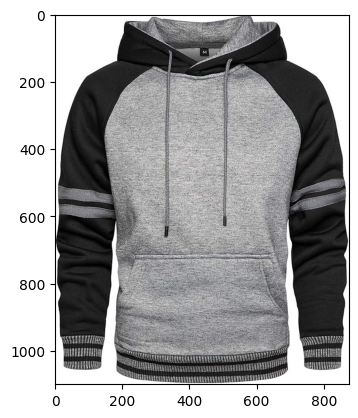

In [47]:
img_path = r'D:\Visual Studio Code\ML\Youtube_ML_Code\Fashion Mnist Recognition\Pullover.jpg'
img_recive = Image.open(img_path)
img_array= np.array(img_recive)
plt.imshow(img_array)
def img_processing(img_path):
    img = Image.open(img_path)
    img = img.resize((28,28))
    img = img.convert('L')
    img = np.array(img) / 255.0
    img = img.reshape((1,28,28,1))
    return img

img = img_processing(img_path)
result = model.predict(img)

pred = np.argmax(result)
prediction = Class_name[pred]

print("Prediction :",prediction)

